## import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
path = r'/Users/febingeorge/Documents/Career Foundry Notes'

In [3]:
df = pd.read_csv(os.path.join(path,'subset_boats.csv'),index_col = False)

In [4]:
df.head(20)

,Unnamed: 0,Year Built,Length,Width,Number of views last 7 days,Prices in Euros,Views Per Country
0,0,2017,4.00,1.90,226,3570.59,382211
1,1,2020,4.00,1.50,75,3490.00,300033
2,2,2021,3.69,1.42,124,4033.90,382211
3,3,2020,3.00,1.00,64,3367.00,22763
4,4,2019,3.55,1.46,58,3399.00,300033
5,5,2021,4.03,1.56,132,3905.50,382211
6,6,1999,6.20,2.38,474,3852.00,382211
7,7,2021,3.00,3.52,134,3224.00,22763
8,8,2019,3.64,1.37,45,3333.00,300033
9,9,2018,4.35,1.73,180,3300.00,212238


In [9]:
df.shape

(9888, 7)

## Data Consistency Check

In [685]:
df.isnull().sum()

Unnamed: 0                     0
Year Built                     0
Length                         0
Width                          0
Number of views last 7 days    0
Prices in Euros                0
Views Per Country              0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [689]:
df.dtypes

Unnamed: 0                       int64
Year Built                       int64
Length                         float64
Width                          float64
Number of views last 7 days      int64
Prices in Euros                float64
Views Per Country                int64
dtype: object

In [691]:
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)

/var/folders/vk/t91x8sx96dgcp872p9l713yh0000gn/T/ipykernel_41854/3630298113.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/vk/t91x8sx96dgcp872p9l713yh0000gn/T/ipykernel_41854/3630298113.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/vk/t91x8sx96dgcp872p9l713yh0000gn/T/ipykernel_41854/3630298113.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/vk/t91x8sx96dgcp872p9l713yh0000gn/T/ipykernel_41854/3630298113.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/fol

In [693]:
df = df.drop(columns = ['Unnamed: 0'])

## Standardization

In [699]:
df[['Length','Width','Number of views last 7 days','Prices in Euros','Views Per Country']] = MinMaxScaler().fit_transform(df[['Length','Width','Number of views last 7 days','Prices in Euros','Views Per Country']])

In [672]:
#sc = StandardScaler() # creating an instance of the class object
#df_new = pd.DataFrame(sc.fit_transform(df),columns=df[['Length','Width','Number of views last 7 days','Prices in Euros','Views Per Country']],index = labels)  #fit and transforming StandardScaler the dataframe 

In [535]:
#scaler = StandardScaler()
#scaler.fit(df)
#print(scaler.mean_)
#print(scaler.transform(df))

[2.00581129e+03 1.15700172e+01 3.52012338e+00 1.49160801e+02
 3.03181204e+05 1.84457942e+05]
[[ 0.6857587  -1.26171507 -1.33123118  0.50614682 -0.3087363   1.72704456]
 [ 0.86962935 -1.26171507 -1.65990521 -0.48850397 -0.30881935  1.0093562 ]
 [ 0.93091957 -1.3133836  -1.72564001 -0.16573649 -0.30825888  1.72704456]
 ...
 [ 0.86962935 -1.195046   -1.41339969  1.34929451 -0.30777961  1.0093562 ]
 [ 0.74704892 -1.20004618 -1.33944803  0.76963047 -0.30798468  0.24261267]
 [ 0.80833914 -1.32838414 -1.5777367   0.2953599  -0.30824785  1.72704456]]


In [537]:
#col_names = ['Prices in Euros', 'Views Per Country']
#features = df[col_names]

#scaler = StandardScaler().fit(features.values)
#features = scaler.transform(features.values)
#scaled_features = pd.DataFrame(features, columns = col_names)


In [701]:
df.head()

,Year Built,Length,Width,Number of views last 7 days,Prices in Euros,Views Per Country
0,2017,0.029911,0.075149,0.065538,0.000011,1.000000
1,2020,0.029911,0.059245,0.019077,0.000009,0.784967
2,2021,0.026778,0.056064,0.034154,0.000026,1.000000
3,2020,0.019806,0.039364,0.015692,0.000005,0.059443
4,2019,0.025364,0.057654,0.013846,0.000006,0.784967


## Kmeans Algorithm

#### Elbow Technique

In [705]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [707]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-2633222.286311696,
 -1129096.3238146007,
 -582580.1397186313,
 -273790.3607936987,
 -151230.9080595211,
 -114840.00350897363,
 -85773.29023636217,
 -68637.41040435752,
 -55332.34203047961]

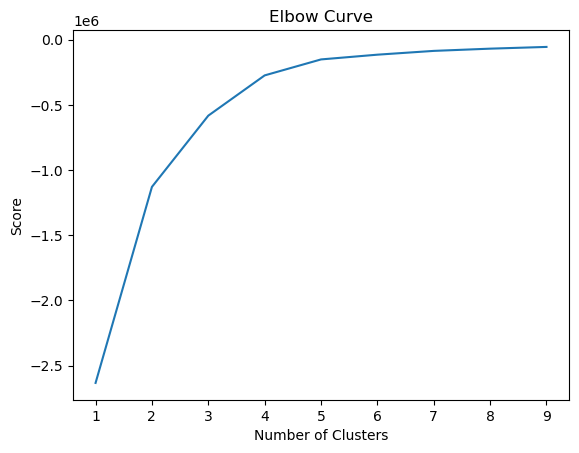

In [709]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from two to four on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is four.

In [712]:
#create kmeans object
kmeans = KMeans(n_clusters = 4)

In [714]:
#fit kmeans object into the data
Kmeans.fit(df)

KMeans(n_clusters=3)

In [716]:
df['clusters'] = kmeans.fit_predict(df)

In [718]:
df['clusters'].value_counts()

clusters
1    4140
3    4044
0    1548
2     156
Name: count, dtype: int64

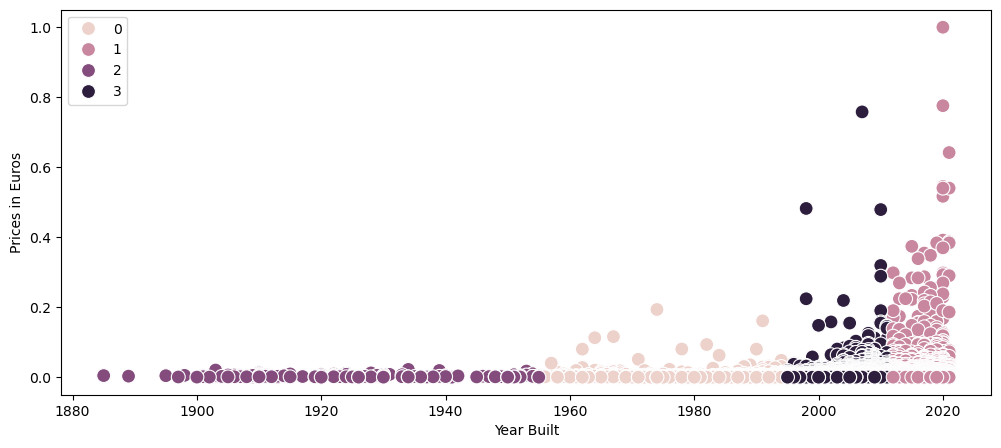

In [720]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,5))
ax = sns.scatterplot(x=df['Year Built'], y=df['Prices in Euros'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Year Built') # Label x-axis.
plt.ylabel('Prices in Euros') # Label y-axis.
plt.show()

Here it is quite evident that low/cheap price boats are available from  1880 to 2000 but moderate to high price boats are seen in the years from 2000 to 2021

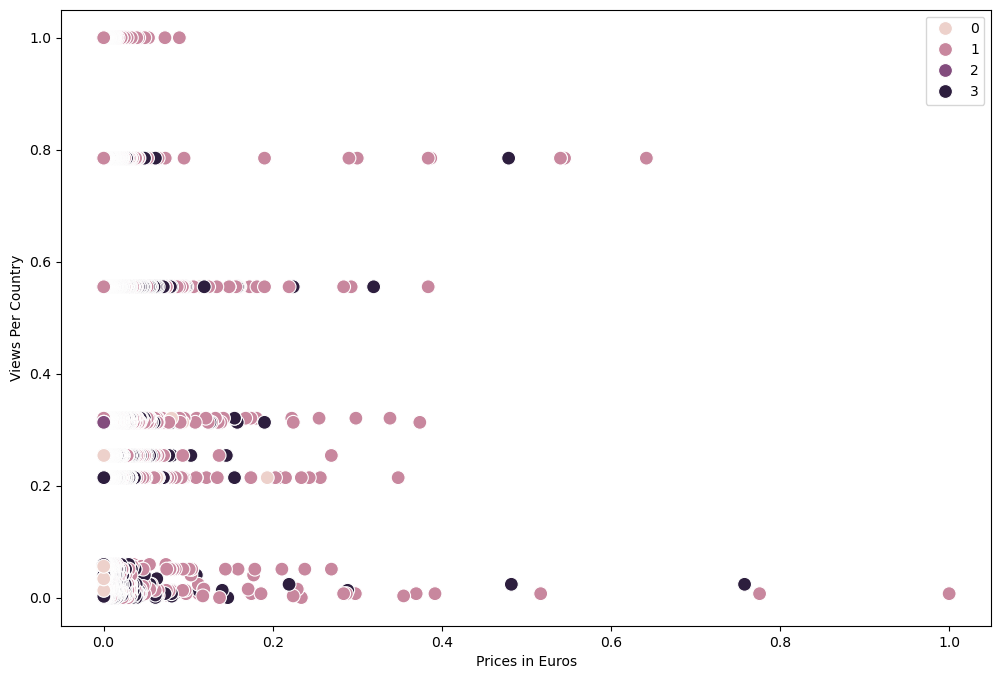

In [722]:
# Plot the clusters for the "House Age" and ''Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Prices in Euros'], y=df['Views Per Country'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Prices in Euros') 
plt.ylabel('Views Per Country') 
plt.show()

Here , we can see that the no of views are mostly accumulated for the boats of low to medium prices 

In [724]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'
df.loc[df['clusters'] == 3, 'cluster'] = 'Black'

In [728]:
df.groupby('cluster').agg({'Year Built':['mean', 'median'], 
                         'Prices in Euros':['mean', 'median'],
                          'Views Per Country':['mean', 'median']})

Year Built         Prices in Euros           Views Per Country  \
                    mean  median            mean    median              mean   
cluster                                                                        
Black        2004.415430  2005.0        0.009195  0.004413          0.405700   
dark purple  1926.608974  1926.0        0.003522  0.002304          0.380111   
pink         1984.101421  1987.0        0.003036  0.001477          0.521655   
purple       2018.276812  2019.0        0.012863  0.002767          0.546845   

                       
               median  
cluster                
Black        0.320600  
dark purple  0.320600  
pink         0.555237  
purple       0.555237